Nama= Sardi Irfansyah

Time Series dengan LSTM




## Install Kaggle & download dataset

In [345]:
# install kaggle package
!pip install -q kaggle

In [346]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sardiirfansyah","key":"3111a75f581bb28ea20c0e230c9a5338"}'}

In [347]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [348]:
# download dataset
!kaggle datasets download -d mahirkukreja/delhi-weather-data

  0% 0.00/1.00M [00:00<?, ?B/s]
100% 1.00M/1.00M [00:00<00:00, 69.4MB/s]


In [349]:
# unzip
!mkdir delhi-weather-data
!unzip delhi-weather-data.zip -d delhi-weather-data
!ls delhi-weather-data

mkdir: cannot create directory ‘delhi-weather-data’: File exists
Archive:  delhi-weather-data.zip
  inflating: delhi-weather-data/testset.csv  
testset.csv


## Load & Read Dataset

In [350]:
# load dataset
import pandas as pd
data = pd.read_csv('delhi-weather-data/testset.csv')
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [351]:
data.tail()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
100989,20170424-18:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [352]:
# total data
data.shape

(100990, 20)

In [353]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [354]:
# null check
data.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

# Cleaning Data & Visualisasi

In [355]:
#konvert datetime_utc ke Datetime Format
data['datetime_utc']=pd.to_datetime(data['datetime_utc'])
# isi data kosong dengan nilai mean
data[' _tempm'].fillna(data[' _tempm'].mean(), inplace=True)
data = data[['datetime_utc',' _tempm' ]]
#ubah nama kolum
data.rename(columns={'datetime_utc':'date',' _tempm':'tmp'}, inplace=True)
data.head()

,date,tmp
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0


In [356]:
data.isnull().sum()

date    0
tmp     0
dtype: int64

In [357]:
data1=data[['date','tmp']].copy()

In [358]:
data1.set_index('date', inplace= True)
#resampling data menjadi mean tiap tanggal
data1 =data1.resample('D').mean()
data1.head()

,tmp
date,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000


In [359]:
data1.isnull().sum()

tmp    141
dtype: int64

In [360]:
# isi data kosong dengan nilai mean
data1['tmp'].fillna(data1['tmp'].mean(), inplace=True)
#cek data
data1.isnull().sum()

tmp    0
dtype: int64

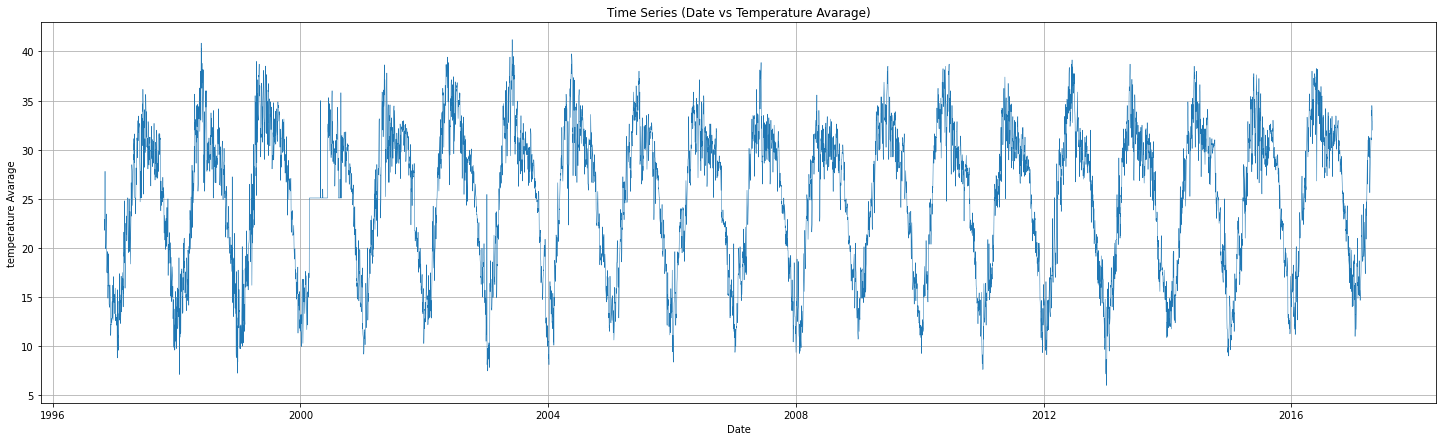

In [361]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))
plt.plot(data1, linewidth=.5)
plt.grid()
plt.title("Time Series (Date vs Temperature Avarage)")
plt.xlabel('Date')
plt.ylabel('temperature Avarage')
plt.show()

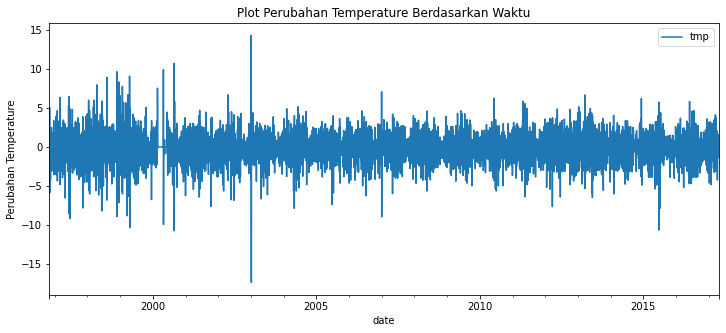

In [362]:
# Differencing the tmp
data_diff = data1.diff(1).dropna()

# Plotting the differences
data_diff.plot(figsize=(12,5))
plt.title('Plot Perubahan Temperature Berdasarkan Waktu')
plt.ylabel('Perubahan Temperature')
plt.show()

**Testing Stationaritas**

In [363]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(data_diff.tmp)
print(f"P-value: {results[1]}")

P-value: 1.573405066060684e-19


P-value < .05 menunjukkan data stasioner


**ACF and PACF for the Differencing**

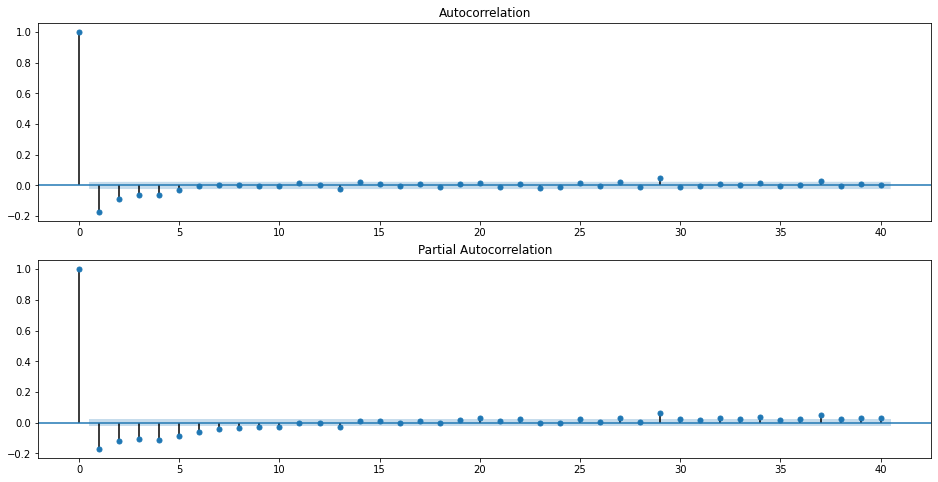

In [364]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,8))
plot_acf(data_diff, ax=ax1, lags=40)
plot_pacf(data_diff, ax=ax2, lags=40)
plt.show()

# Pembuatan Model

In [365]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

**Splitting Data**

In [366]:
# get data values
date = data['date'].values
temp = data['tmp'].values

In [367]:
#split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp, date, test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_train), len(x_test))

80792 20198


In [368]:
# model
from keras.layers import Dense, LSTM

data_train = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=1000)
data_test = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [369]:
#optimizer model
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [370]:
Mae = (data1['tmp'].max() - data1['tmp'].min()) * 10/100
print(Mae)

3.5210526315789474


In [373]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< Mae):
      print("\nMAE dari model < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [374]:
tf.keras.backend.set_floatx('float64')
history = model.fit(data_train ,epochs=100, validation_data=data_test, callbacks=[callbacks])

Epoch 1/100
808/808 [==============================] - 25s 28ms/step - loss: 18.1495 - mae: 18.6455 - val_loss: 5.9010 - val_mae: 6.3825
Epoch 2/100
808/808 [==============================] - 22s 27ms/step - loss: 6.0183 - mae: 6.5017 - val_loss: 4.2815 - val_mae: 4.7601
Epoch 3/100
808/808 [==============================] - 22s 27ms/step - loss: 3.7667 - mae: 4.2414 - val_loss: 3.7881 - val_mae: 4.2663
Epoch 4/100
808/808 [==============================] - 22s 27ms/step - loss: 3.5745 - mae: 4.0480 - val_loss: 3.7190 - val_mae: 4.1959
Epoch 5/100
808/808 [==============================] - 22s 27ms/step - loss: 3.5061 - mae: 3.9795 - val_loss: 3.6838 - val_mae: 4.1602
Epoch 6/100
808/808 [==============================] - 22s 27ms/step - loss: 3.4664 - mae: 3.9398 - val_loss: 3.6452 - val_mae: 4.1224
Epoch 7/100
808/808 [==============================] - 22s 27ms/step - loss: 3.4300 - mae: 3.9030 - val_loss: 3.6231 - val_mae: 4.1003
Epoch 8/100
808/808 [==============================] 

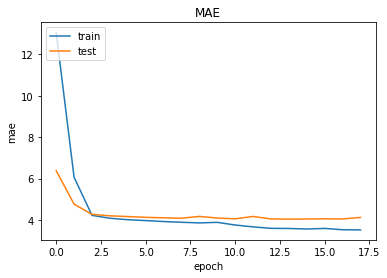

In [375]:
# plot of mae
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

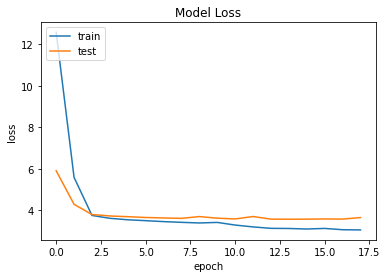

In [376]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()